# 장애인콜택시 대기시간 예측
## 단계1.데이터 전처리

## 0.미션

* 1.데이터를 탐색하며 정보 획득
    * 데이터는 2015-01-01 ~ 2022-12-31 까지의 서울 장애인 콜택시 운행 정보입니다. 우리는 평균대기시간을 예측하고자 합니다. 
    * 요일, 월, 계절, 연도별 운행 정보에 어떤 주기와 변화가 있는지 탐색해 봅시다.
* 2.분석을 위한 데이터 구조 만들기
    * 문제정의 : 
        * 전 날 콜택시 운행이 종료되었을 때, 다음 날 대기시간을 예측하고자 합니다.

        * 만약 다음 날 대기시간을 예측할 수 있다면, 일정 범위 내에서 배차를 조절할 수 있을 뿐만 아니라, 향후 교통약자의 이동 편의 증진을 위한 정책 수립 및 개선에 기여할 수 있습니다. 
    * 이를 위한 데이터 구조를 만들어 봅시다.
        * 분석 단위는 일별 데이터 입니다.
        * 주어진 데이터 : 장애인 콜택시 운행 정보, 서울시 날씨
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전 날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
        * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙여서 만듭시다.
        * 휴무일 데이터는 패키지를 통해서 다운받아 사용합니다.
    * Feature Engineering
        * 대기시간에 영향을 주는 요인을 도출하고(가설수립) 이를 feature로 생성합시다.
        * 주어진 그대로의 데이터가 아닌 새로운 feature를 생성해 봅시다.
            * 날짜와 관련된 feature : 요일, 월, 계절 ... 
            * 시계열 특성이 반영된 feature : 최근 7일간의 평균 대기시간 ...




## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [ ]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (3) 데이터 불러오기
* 주어진 데이터셋
    * 장애인 콜택시 운행 정보 : open_data.csv
    * 날씨 데이터 : weather.csv

#### 1) 데이터로딩

In [172]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_o = pd.read_csv('open_data.csv')
data_w = pd.read_csv('weather.csv')

#### 2) 기본 정보 조회

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 전체 데이터의 행,열 개수 확인
data_o.shape, data_w.shape

((2922, 7), (4018, 7))

In [12]:
data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4018 non-null   object 
 1   temp_max         4018 non-null   float64
 2   temp_min         4018 non-null   float64
 3   rain(mm)         4018 non-null   float64
 4   humidity_max(%)  4018 non-null   float64
 5   humidity_min(%)  4018 non-null   float64
 6   sunshine(MJ/m2)  4018 non-null   float64
dtypes: float64(6), object(1)
memory usage: 219.9+ KB


In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 전체 데이터의 모든 변수 확인
data_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일     2922 non-null   object 
 1   차량운행    2922 non-null   int64  
 2   접수건     2922 non-null   int64  
 3   탑승건     2922 non-null   int64  
 4   평균대기시간  2922 non-null   float64
 5   평균요금    2922 non-null   int64  
 6   평균승차거리  2922 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 159.9+ KB


#### 3) 칼럼이름을 영어로 변경
* 꼭 필요한 작업은 아니지만, 데이터를 편리하게 다루고 차트에서 불필요한 경고메시지를 띄우지 않게 하기 위해 영문으로 변경하기를 권장합니다.


In [13]:
data_o.head()

,기준일,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611
2,2015-01-03,209,1648,1514,26.2,2377,10198
3,2015-01-04,196,1646,1526,24.5,2431,10955
4,2015-01-05,421,4250,3730,26.2,2214,8663


In [52]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_o.columns = ['Date', 'vehicle_c', 'receipt_c', 'boarding_c', 'waiting_time', 'fare', 'distance']
data_o

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611
2,2015-01-03,209,1648,1514,26.2,2377,10198
3,2015-01-04,196,1646,1526,24.5,2431,10955
4,2015-01-05,421,4250,3730,26.2,2214,8663
...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178
2918,2022-12-28,607,5654,4648,44.8,2161,7882
2919,2022-12-29,581,5250,4247,52.5,2229,8433
2920,2022-12-30,600,5293,4200,38.3,2183,8155


## 2.데이터 기본 탐색

* **세부요구사항**
    * 날짜 요소에 따라 각 정보의 패턴을 조회 합니다.
        * 일별, 요일별, 주차별, 월별, 연도별
        * 접수건, 탑승건, 거리, 요금, 대기시간 등
    * 제시된 범위 외에 가능하다면 추가 탐색을 시도합니다.

### (1) 주기별 분석을 위해서 날짜 변수 추가하기
* data를 복사합니다.
* 복사한 df에 요일, 주차, 월, 연도 등을 추가합니다.

In [53]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_o_1 = data_o.copy()

In [54]:
data_o_1['Date'] = pd.to_datetime(data_o_1['Date'])

In [55]:
data_o_1['day_of_week'] = data_o_1['Date'].dt.dayofweek # 날짜의 요일을 월요일(0)부터 일요일(6)까지의 숫자로 반환
data_o_1['week_of_year'] = data_o_1['Date'].dt.isocalendar().week
data_o_1['month'] = data_o_1['Date'].dt.month
data_o_1['year'] = data_o_1['Date'].dt.year

data_o_1.head() 

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,day_of_week,week_of_year,month,year
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1,1,2015
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,2,1,2015


### (2) 일별

* 차량 운행수

In [56]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_o_1['vehicle_c'].describe()

count    2922.000000
mean      418.701916
std       133.755162
min       132.000000
25%       278.000000
50%       454.000000
75%       522.000000
max      1413.000000
Name: vehicle_c, dtype: float64

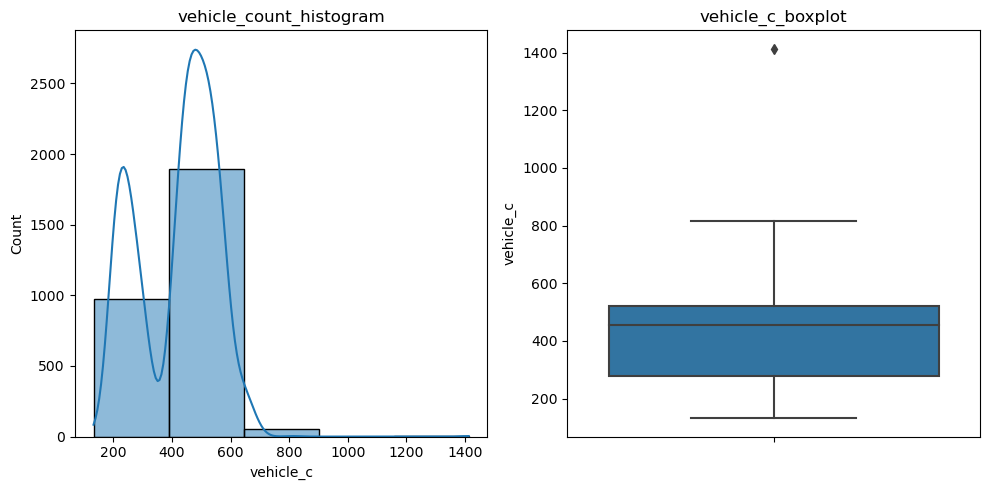

In [57]:
# 변수1의 히스토그램
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_o_1['vehicle_c'], bins=5, kde=True)  # 히스토그램 그리기
plt.title('vehicle_count_histogram')

# 변수2의 상자 그림
plt.subplot(1, 2, 2)
sns.boxplot(y=data_o_1['vehicle_c'])
plt.title('vehicle_c_boxplot')

plt.tight_layout()
plt.show()

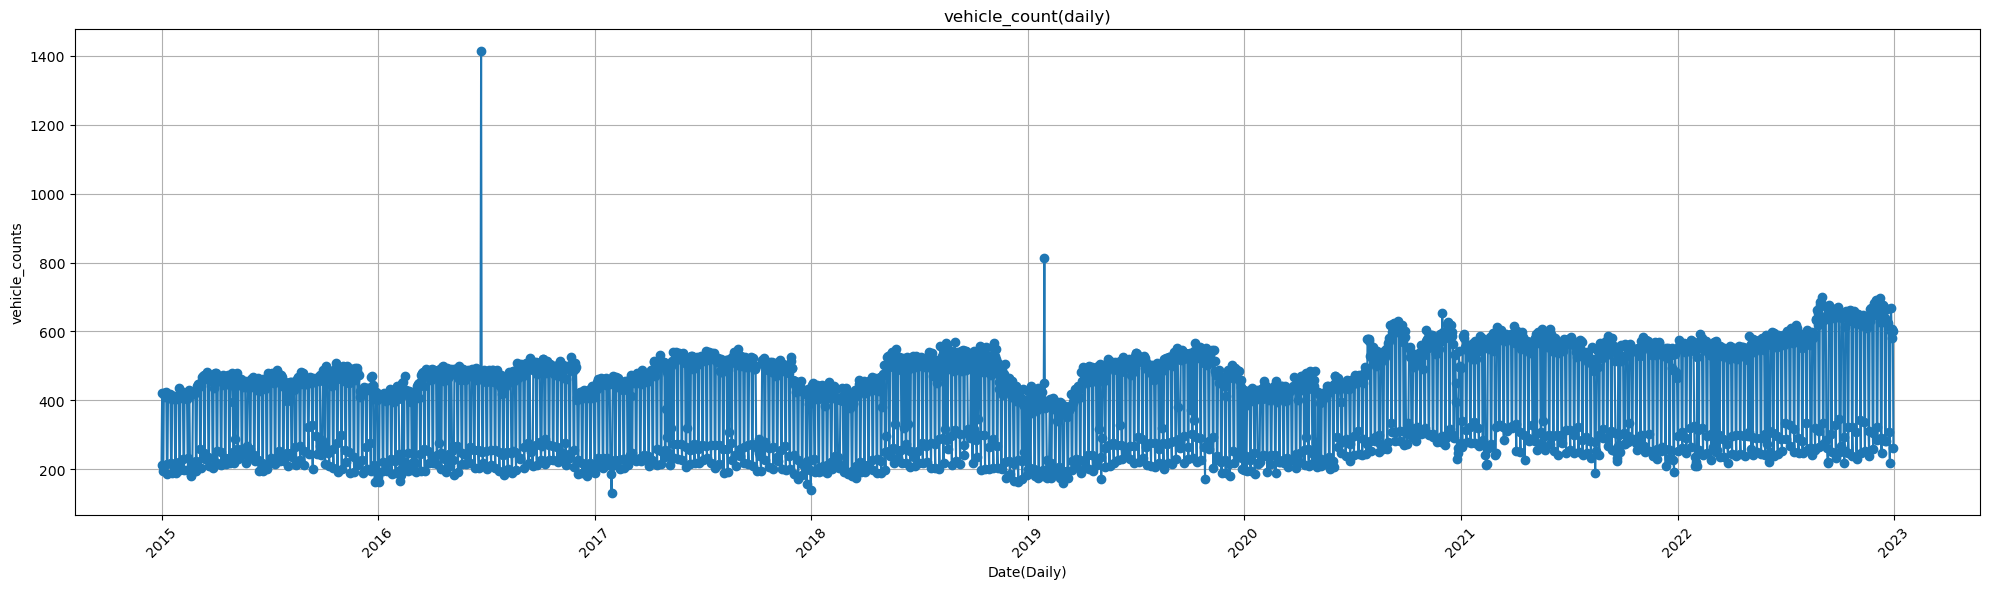

In [58]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 그래프 생성
plt.figure(figsize=(20, 6))
plt.plot(data_o_1['Date'], data_o_1['vehicle_c'], marker='o', linestyle='-')
plt.title('vehicle_count(daily)')
plt.xlabel('Date(Daily)')
plt.ylabel('vehicle_counts')
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

In [62]:
data_o_1[data_o_1['vehicle_c'] >= 800]

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,day_of_week,week_of_year,month,year
539,2016-06-23,1413,5111,4378,41.0,2268,9219,3,25,6,2016
1489,2019-01-29,814,4943,3758,63.9,2269,8722,1,5,1,2019


* 접수건, 탑승건

In [63]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_o_1[['receipt_c', 'boarding_c']].describe()

,receipt_c,boarding_c
count,2922.000000,2922.000000
mean,3925.607803,3283.895277
std,1509.741713,1249.165876
min,527.000000,462.000000
25%,2162.500000,1779.000000
50%,4720.500000,3932.500000
75%,5110.000000,4241.000000
max,6182.000000,5189.000000


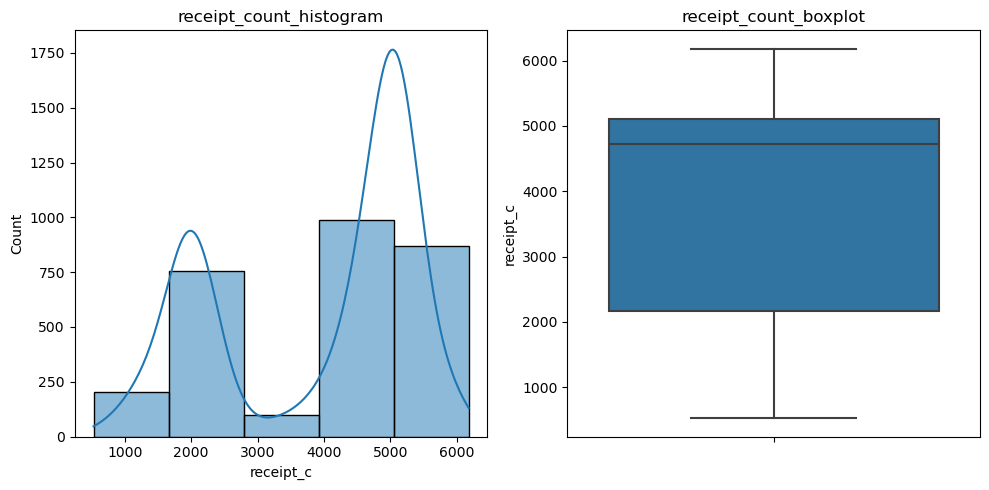

In [65]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_o_1['receipt_c'], bins=5, kde=True)  # 히스토그램 그리기
plt.title('receipt_count_histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_o_1['receipt_c'])
plt.title('receipt_count_boxplot')

plt.tight_layout()
plt.show()

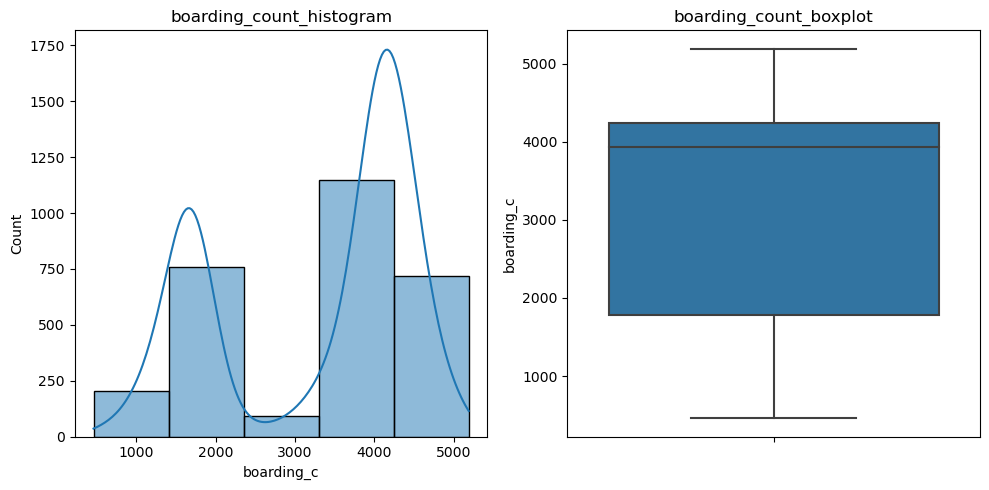

In [66]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_o_1['boarding_c'], bins=5, kde=True)  # 히스토그램 그리기
plt.title('boarding_count_histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_o_1['boarding_c'])
plt.title('boarding_count_boxplot')

plt.tight_layout()
plt.show()

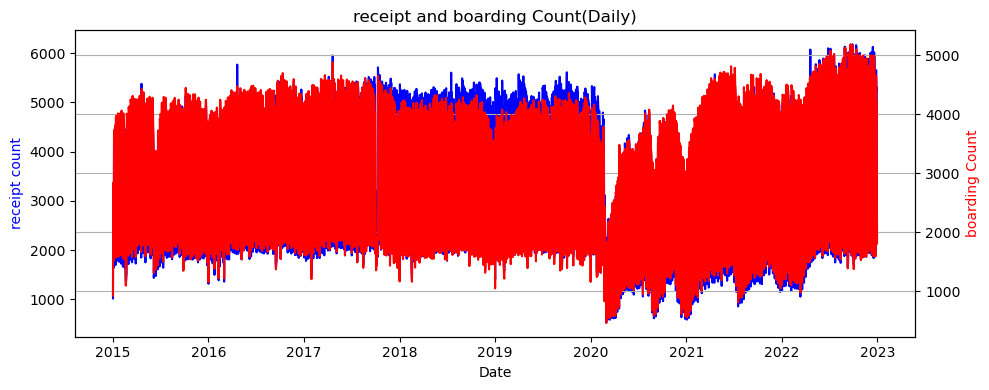

In [71]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# tmp = df[df['date'] == '2021-04-03']

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 4))

# 온도 그래프 그리기
ax1.plot(data_o_1['Date'], data_o_1['receipt_c'], linestyle='-', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('receipt count', color='blue')

# # 대여 수를 빨간색 점으로 표시 (보조 축 사용)
ax2 = ax1.twinx()
ax2.plot(data_o_1['Date'], data_o_1['boarding_c'], linestyle='-', color='red')
# ax2.scatter(data_o_1['Date'], data_o_1['boarding_c'], color='red', label='Rental Count', zorder=5)
ax2.set_ylabel('boarding Count', color='red')

plt.title('receipt and boarding Count(Daily)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* 대기시간

In [73]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_o_1['waiting_time'].describe()

count    2922.000000
mean       40.305681
std        14.098550
min        17.200000
25%        29.600000
50%        38.200000
75%        48.600000
max        96.100000
Name: waiting_time, dtype: float64

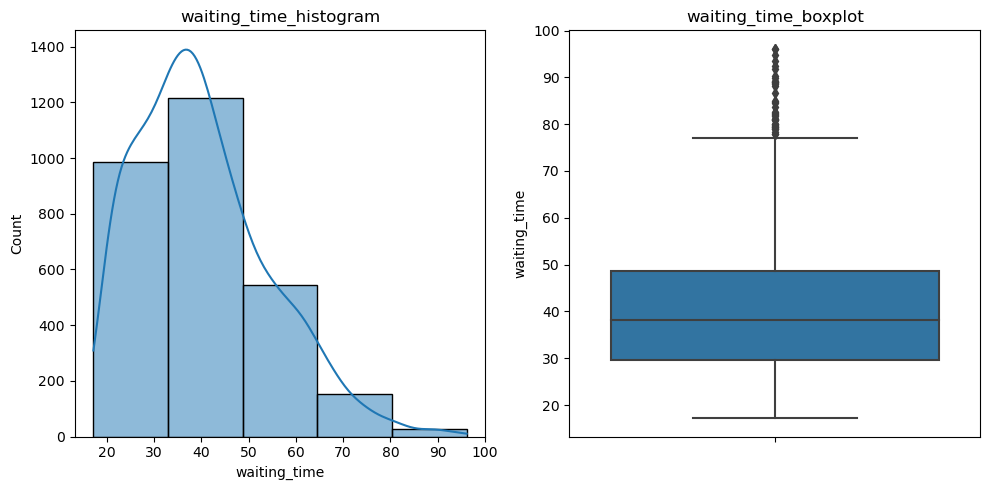

In [74]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_o_1['waiting_time'], bins=5, kde=True)  # 히스토그램 그리기
plt.title('waiting_time_histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_o_1['waiting_time'])
plt.title('waiting_time_boxplot')

plt.tight_layout()
plt.show()

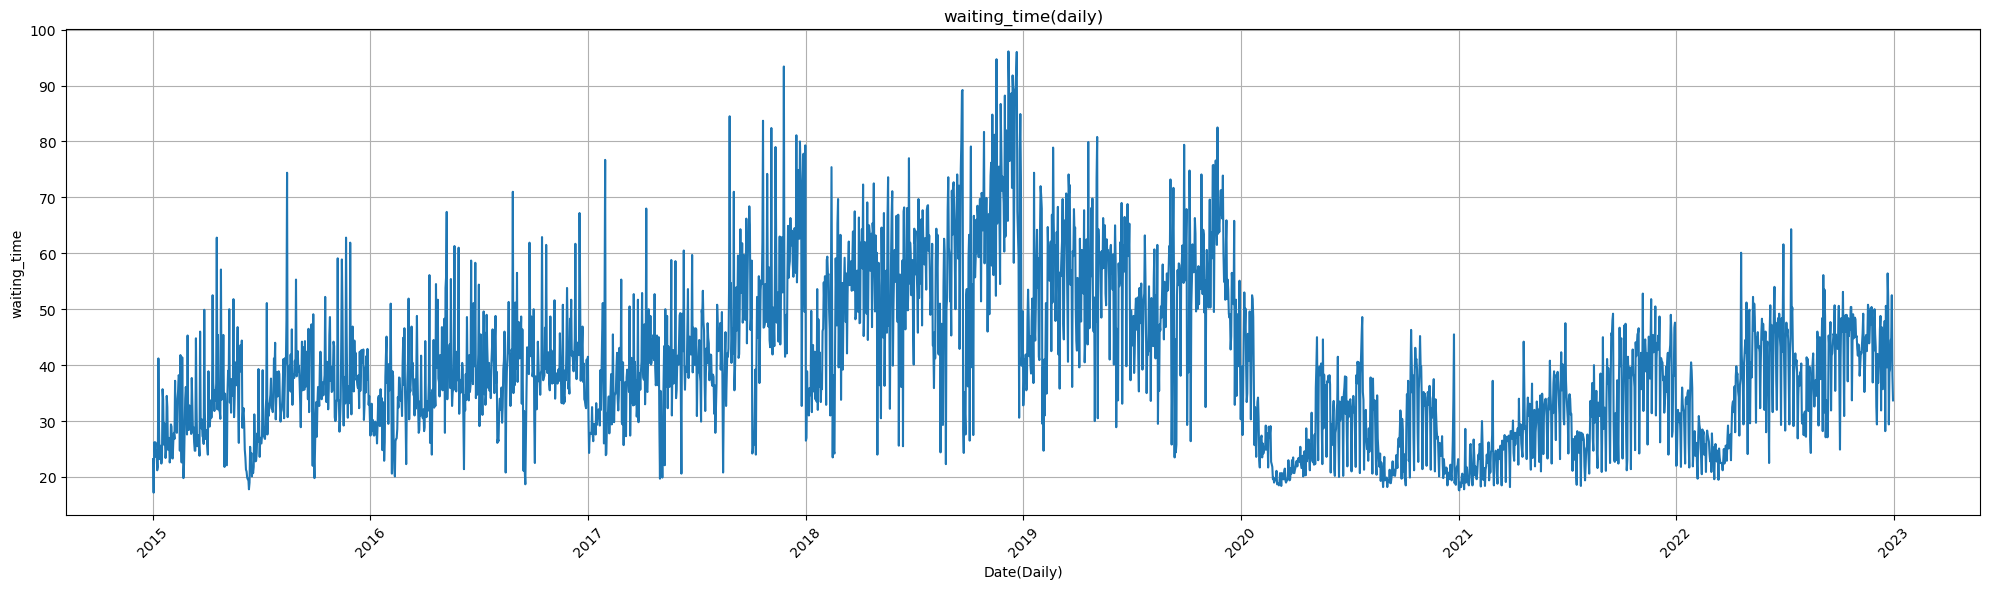

In [76]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 그래프 생성
plt.figure(figsize=(20, 6))
plt.plot(data_o_1['Date'], data_o_1['waiting_time'], linestyle='-')
plt.title('waiting_time(daily)')
plt.xlabel('Date(Daily)')
plt.ylabel('waiting_time')
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

* 운임

In [77]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_o_1['fare'].describe()

count    2922.000000
mean     2304.272416
std       107.260080
min      2131.000000
25%      2228.000000
50%      2257.000000
75%      2400.750000
max      2733.000000
Name: fare, dtype: float64

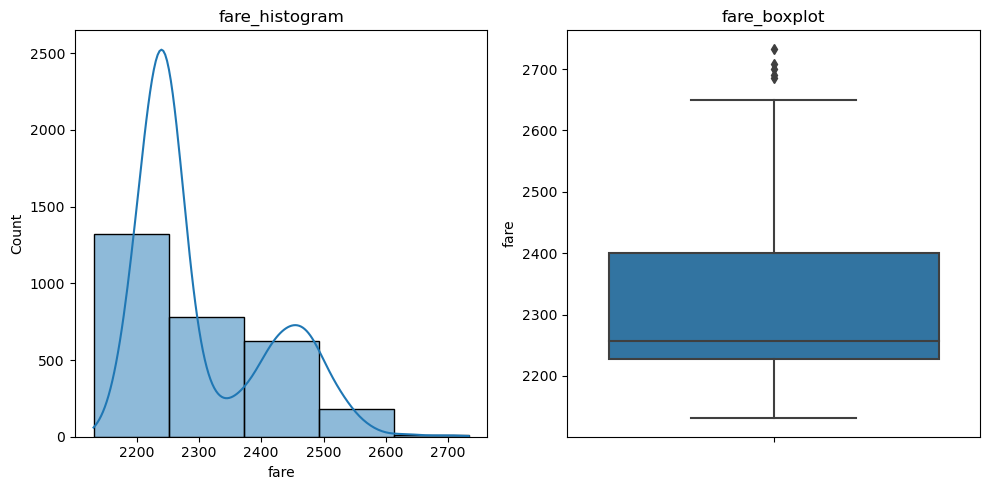

In [78]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_o_1['fare'], bins=5, kde=True)  # 히스토그램 그리기
plt.title('fare_histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_o_1['fare'])
plt.title('fare_boxplot')

plt.tight_layout()
plt.show()

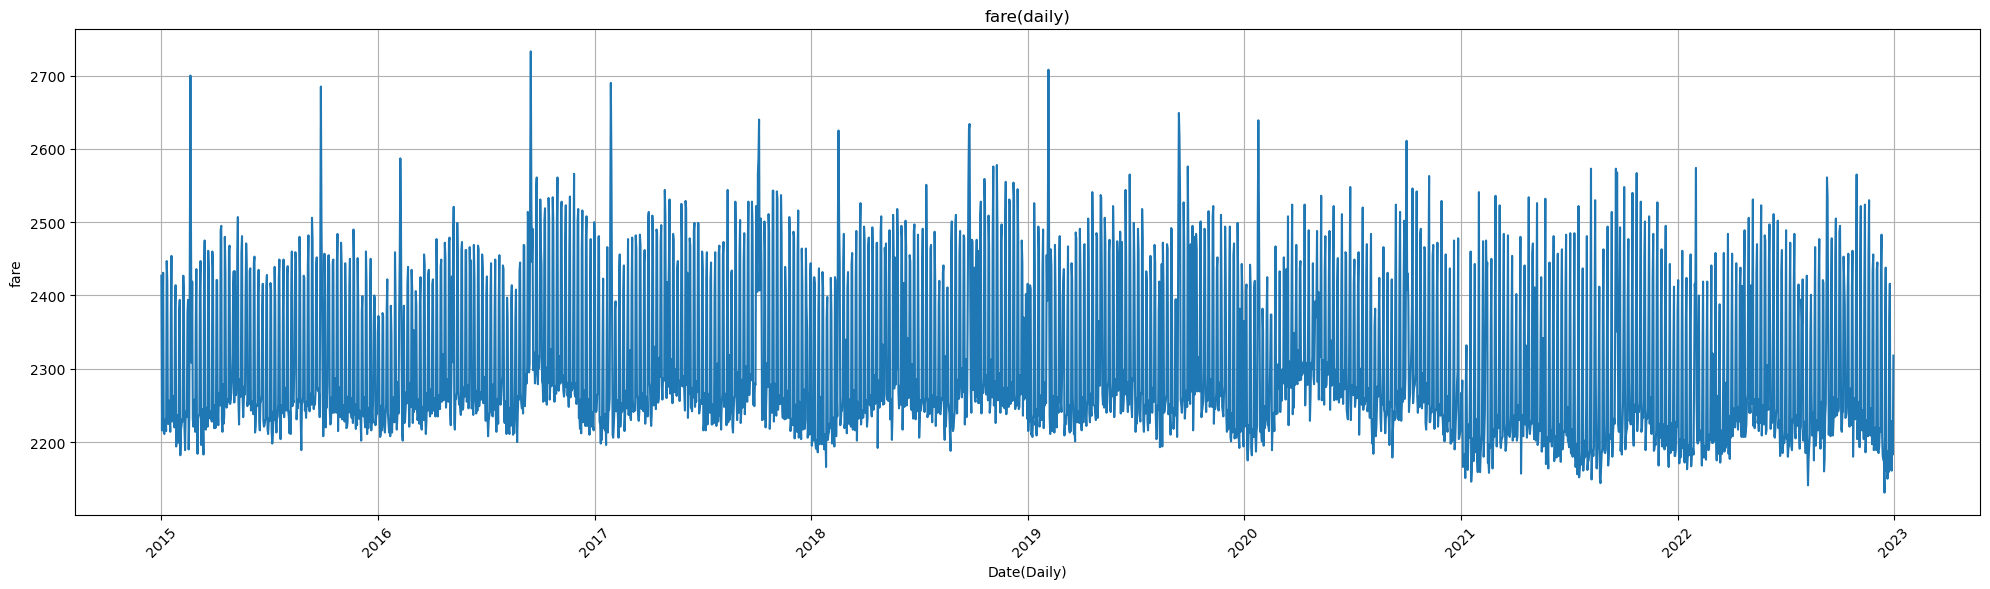

In [79]:
# 그래프 생성
plt.figure(figsize=(20, 6))
plt.plot(data_o_1['Date'], data_o_1['fare'], linestyle='-')
plt.title('fare(daily)')
plt.xlabel('Date(Daily)')
plt.ylabel('fare')
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

* 이동거리

In [81]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_o_1['distance'].describe()

count     2922.000000
mean      9253.500000
std       1019.198152
min       7672.000000
25%       8521.000000
50%       8821.500000
75%      10153.000000
max      14136.000000
Name: distance, dtype: float64

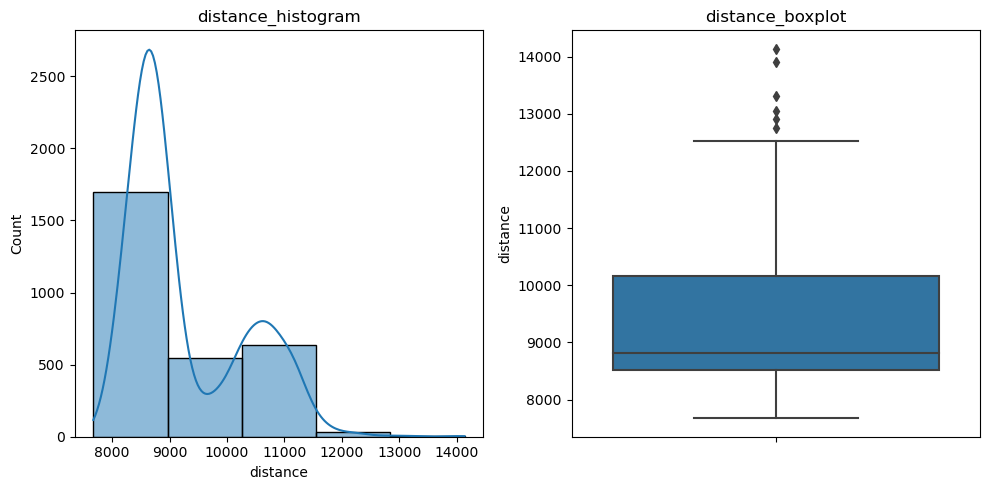

In [82]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_o_1['distance'], bins=5, kde=True)  # 히스토그램 그리기
plt.title('distance_histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_o_1['distance'])
plt.title('distance_boxplot')

plt.tight_layout()
plt.show()

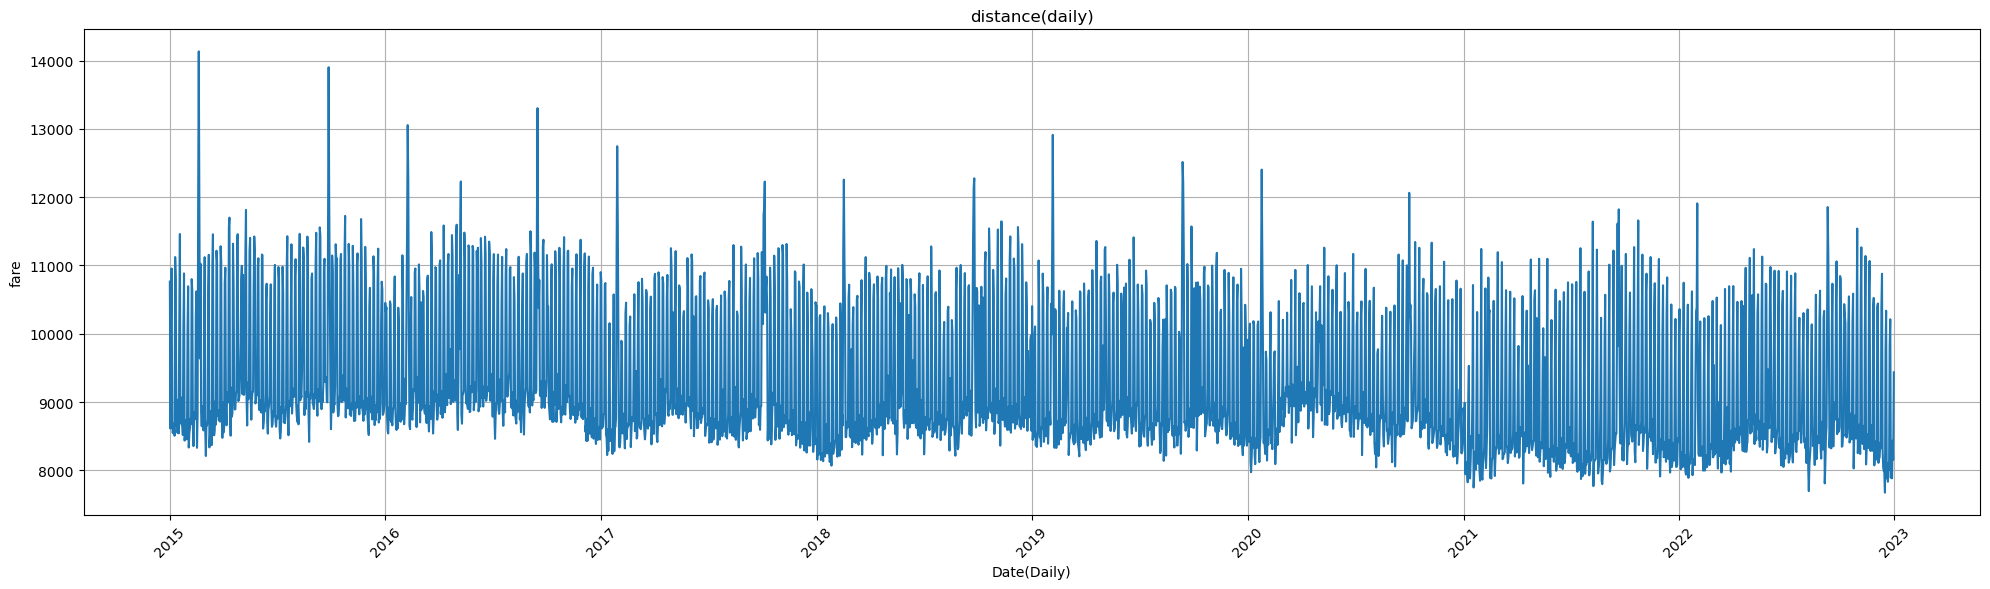

In [83]:
# 그래프 생성
plt.figure(figsize=(20, 6))
plt.plot(data_o_1['Date'], data_o_1['distance'], linestyle='-')
plt.title('distance(daily)')
plt.xlabel('Date(Daily)')
plt.ylabel('fare')
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

### (3) 요일별

In [87]:
dict_day = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

data_o_1['day_of_week'] = data_o_1['day_of_week'].map(dict_day)
data_o_1

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,day_of_week,week_of_year,month,year
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,1,2015
1,2015-01-02,420,3158,2839,17.2,2216,8611,Friday,1,1,2015
2,2015-01-03,209,1648,1514,26.2,2377,10198,Saturday,1,1,2015
3,2015-01-04,196,1646,1526,24.5,2431,10955,Sunday,1,1,2015
4,2015-01-05,421,4250,3730,26.2,2214,8663,Monday,2,1,2015
...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178,Tuesday,52,12,2022
2918,2022-12-28,607,5654,4648,44.8,2161,7882,Wednesday,52,12,2022
2919,2022-12-29,581,5250,4247,52.5,2229,8433,Thursday,52,12,2022
2920,2022-12-30,600,5293,4200,38.3,2183,8155,Friday,52,12,2022


* 차량 운행수

In [ ]:
## 탑승권 sum
## 대기시간,운임,이동거리 mean

In [94]:
day_vehicle_c = data_o_1.groupby('day_of_week', as_index= False)['vehicle_c'].agg(['sum','min', 'max', 'mean'])
day_vehicle_c

,day_of_week,sum,min,max,mean
0,Friday,202775,178,690,485.107656
1,Monday,202251,197,678,485.014388
2,Saturday,109590,161,345,262.177033
3,Sunday,93728,132,333,224.767386
4,Thursday,206525,182,1413,494.078947
5,Tuesday,206447,182,814,495.076739
6,Wednesday,202131,197,692,484.726619


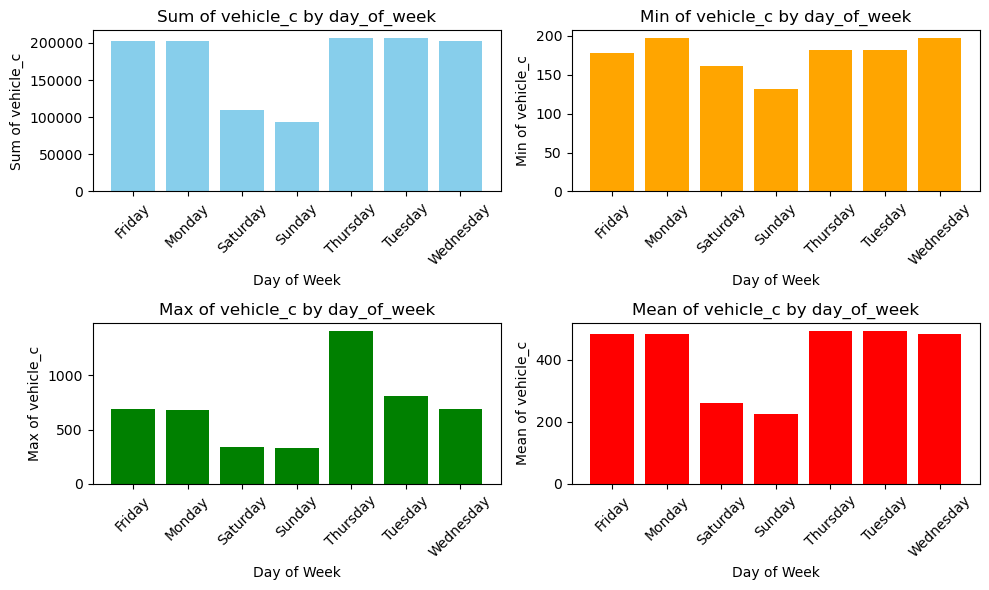

In [97]:
# 막대 그래프를 그릴 변수 추출
days = day_vehicle_c['day_of_week']
sum_values = day_vehicle_c['sum']
min_values = day_vehicle_c['min']
max_values = day_vehicle_c['max']
mean_values = day_vehicle_c['mean']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 합계에 대한 막대 그래프
plt.subplot(2, 2, 1)
plt.bar(days, sum_values, color='skyblue')
plt.title('Sum of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Sum of vehicle_c')
plt.xticks(rotation=45)

# 최소값에 대한 막대 그래프
plt.subplot(2, 2, 2)
plt.bar(days, min_values, color='orange')
plt.title('Min of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Min of vehicle_c')
plt.xticks(rotation=45)

# 최대값에 대한 막대 그래프
plt.subplot(2, 2, 3)
plt.bar(days, max_values, color='green')
plt.title('Max of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Max of vehicle_c')
plt.xticks(rotation=45)

# 평균값에 대한 막대 그래프
plt.subplot(2, 2, 4)
plt.bar(days, mean_values, color='red')
plt.title('Mean of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Mean of vehicle_c')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

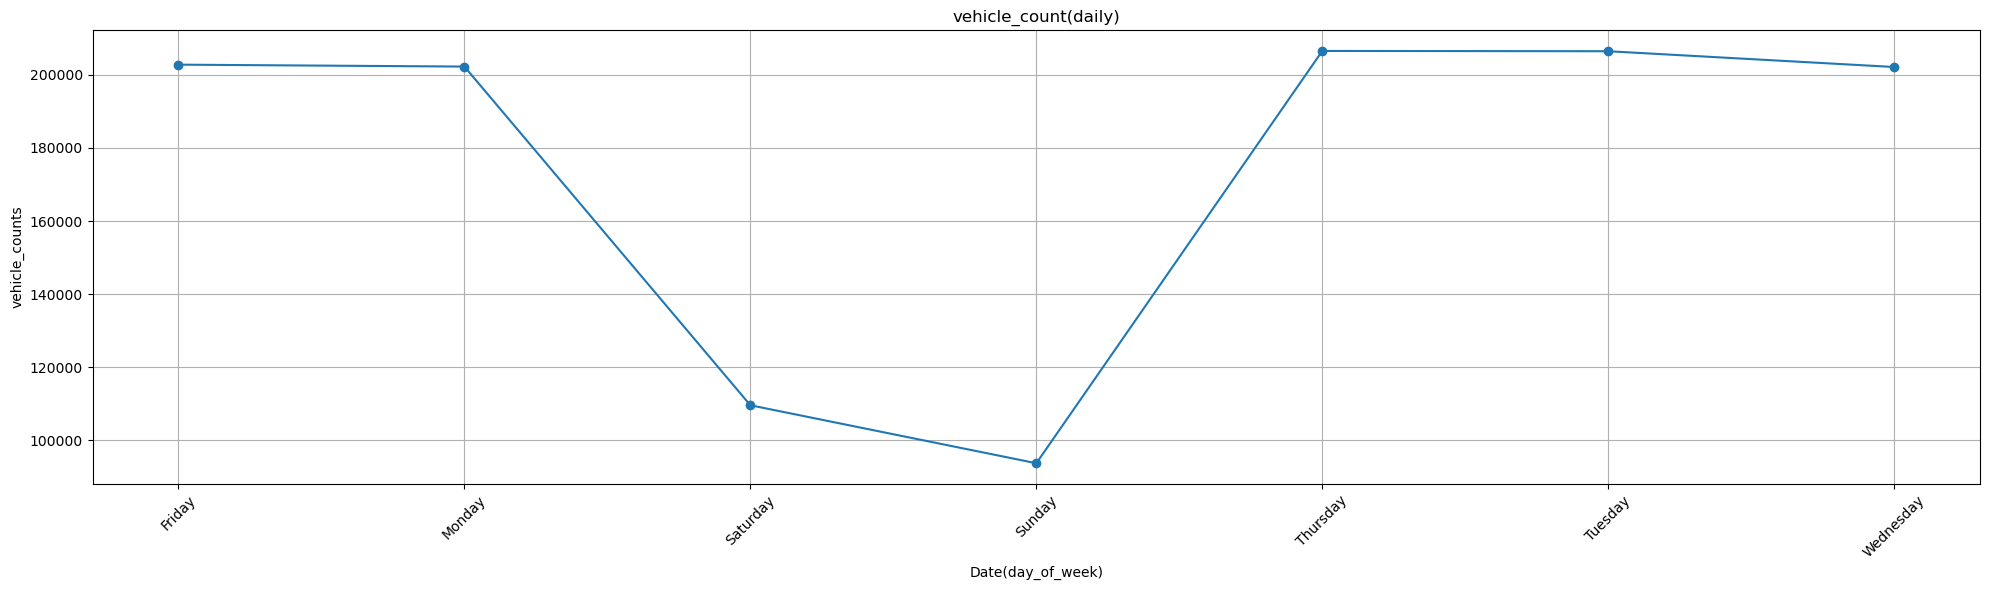

In [96]:
plt.figure(figsize=(20, 6))
plt.plot(day_vehicle_c['day_of_week'], day_vehicle_c['sum'], marker='o', linestyle='-')
plt.title('vehicle_count(daily)')
plt.xlabel('Date(day_of_week)')
plt.ylabel('vehicle_counts')
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

* 접수건, 탑승건

In [258]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
vc_bc = data_o_1.groupby('day_of_week', as_index= False)[['receipt_c', 'boarding_c']].agg(['sum','min', 'max', 'mean'])
vc_bc

receipt_c                          boarding_c              \
                  sum   min   max         mean        sum   min   max   
day_of_week                                                             
Friday        1961284   805  5990  4692.066986    1620747   729  5025   
Monday        1966172  1127  6100  4715.040767    1651838  1004  5151   
Saturday       864876   856  2794  2069.081340     708025   770  2199   
Sunday         710060   527  2154  1702.781775     622813   462  1889   
Thursday      1989963  1023  6133  4760.677033    1662888   924  5129   
Tuesday       2001969  1287  6134  4800.884892    1679172  1046  5130   
Wednesday     1976302  1327  6182  4739.333333    1650059  1156  5189   

                          
                    mean  
day_of_week               
Friday       3877.385167  
Monday       3961.242206  
Saturday     1693.839713  
Sunday       1493.556355  
Thursday     3978.200957  
Tuesday      4026.791367  
Wednesday    3956.976019

In [263]:
vc_bc.index

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='day_of_week')

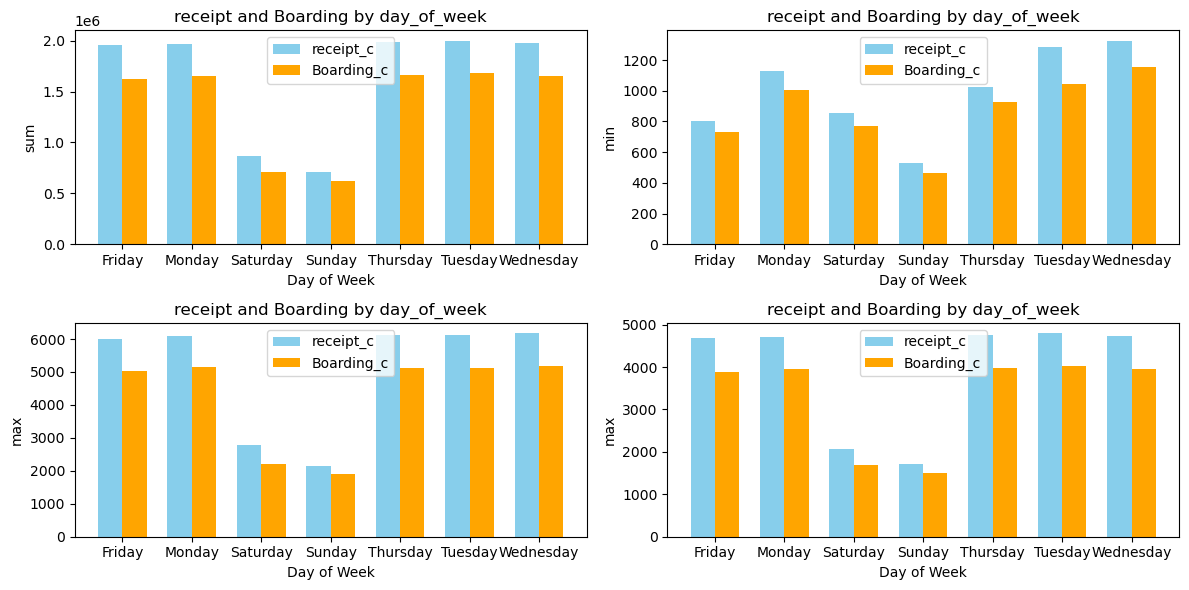

In [264]:
# 막대 그래프를 그릴 변수 추출
days =  vc_bc.index
sum_vehicle_c = vc_bc[('receipt_c', 'sum')]
sum_boarding_c = vc_bc[('boarding_c', 'sum')]
min_vehicle_c = vc_bc[('receipt_c', 'min')]
min_boarding_c = vc_bc[('boarding_c', 'min')]
max_vehicle_c = vc_bc[('receipt_c', 'max')]
max_boarding_c = vc_bc[('boarding_c', 'max')]
mean_vehicle_c = vc_bc[('receipt_c', 'mean')]
mean_boarding_c = vc_bc[('boarding_c', 'mean')]

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(days))

plt.subplot(2, 2, 1)
plt.bar(index, sum_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, sum_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('sum')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.subplot(2, 2, 2)
plt.bar(index, min_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, min_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('min')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(index, max_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, max_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('max')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.subplot(2, 2, 4)
plt.bar(index, mean_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, mean_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('max')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.tight_layout()
plt.show()

* 대기시간

In [127]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
day_wt = data_o_1.groupby('day_of_week', as_index= False)['waiting_time'].agg(['sum','min', 'max', 'mean'])
day_wt

,day_of_week,sum,min,max,mean
0,Friday,17119.8,17.2,96.1,40.956459
1,Monday,16364.4,18.4,82.0,39.243165
2,Saturday,18174.7,17.6,94.7,43.480144
3,Sunday,14554.5,17.8,80.8,34.902878
4,Thursday,17156.3,17.8,92.4,41.043780
5,Tuesday,17024.5,18.2,89.0,40.826139
6,Wednesday,17379.0,18.8,89.8,41.676259


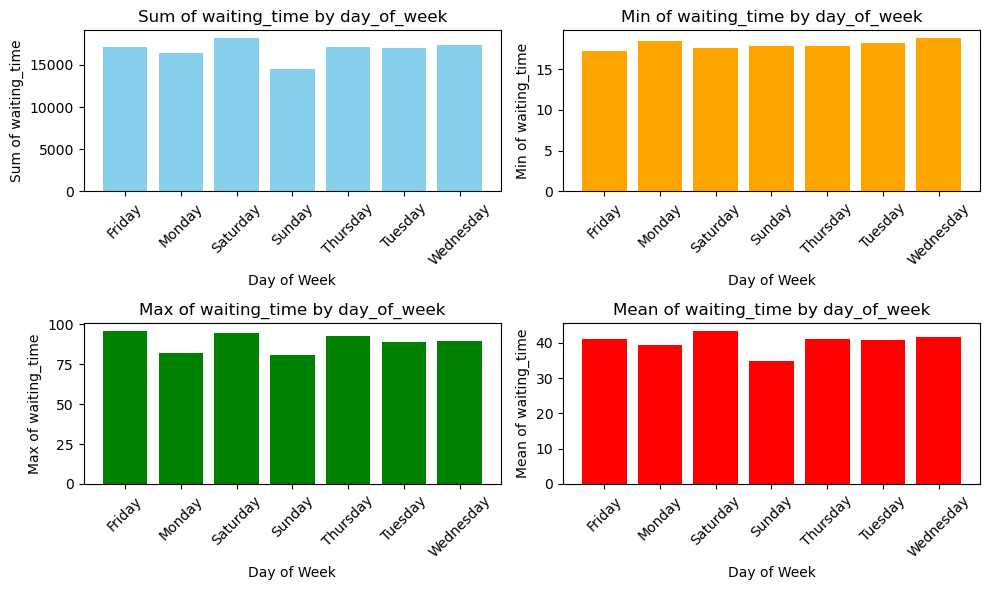

In [134]:
# 막대 그래프를 그릴 변수 추출
days = day_wt['day_of_week']
sum_values = day_wt['sum']
min_values = day_wt['min']
max_values = day_wt['max']
mean_values = day_wt['mean']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 합계에 대한 막대 그래프
plt.subplot(2, 2, 1)
plt.bar(days, sum_values, color='skyblue')
plt.title('Sum of waiting_time by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Sum of waiting_time')
plt.xticks(rotation=45)

# 최소값에 대한 막대 그래프
plt.subplot(2, 2, 2)
plt.bar(days, min_values, color='orange')
plt.title('Min of waiting_time by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Min of waiting_time')
plt.xticks(rotation=45)

# 최대값에 대한 막대 그래프
plt.subplot(2, 2, 3)
plt.bar(days, max_values, color='green')
plt.title('Max of waiting_time by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Max of waiting_time')
plt.xticks(rotation=45)

# 평균값에 대한 막대 그래프
plt.subplot(2, 2, 4)
plt.bar(days, mean_values, color='red')
plt.title('Mean of waiting_time by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Mean of waiting_time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* 운임

In [135]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
day_fare = data_o_1.groupby('day_of_week', as_index= False)['fare'].agg(['sum','min', 'max', 'mean'])
day_fare

,day_of_week,sum,min,max,mean
0,Friday,938838,2131,2649,2246.023923
1,Monday,934105,2146,2628,2240.059952
2,Saturday,1015590,2255,2690,2429.641148
3,Sunday,1027714,2284,2685,2464.541966
4,Thursday,943161,2169,2733,2256.366029
5,Tuesday,935250,2141,2708,2242.805755
6,Wednesday,938426,2150,2588,2250.422062


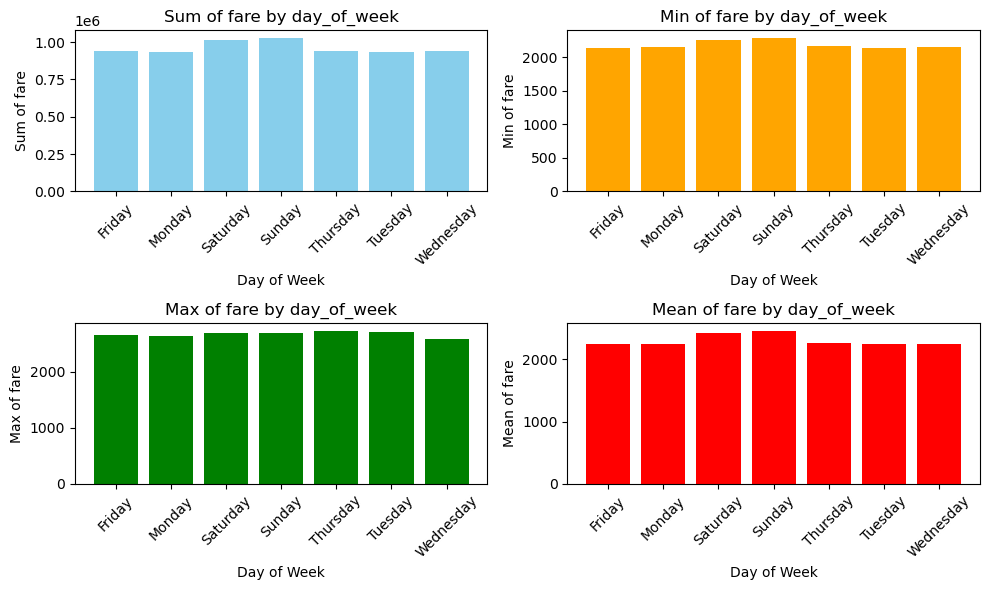

In [137]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
days = day_fare['day_of_week']
sum_values = day_fare['sum']
min_values = day_fare['min']
max_values = day_fare['max']
mean_values = day_fare['mean']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 합계에 대한 막대 그래프
plt.subplot(2, 2, 1)
plt.bar(days, sum_values, color='skyblue')
plt.title('Sum of fare by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Sum of fare')
plt.xticks(rotation=45)

# 최소값에 대한 막대 그래프
plt.subplot(2, 2, 2)
plt.bar(days, min_values, color='orange')
plt.title('Min of fare by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Min of fare')
plt.xticks(rotation=45)

# 최대값에 대한 막대 그래프
plt.subplot(2, 2, 3)
plt.bar(days, max_values, color='green')
plt.title('Max of fare by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Max of fare')
plt.xticks(rotation=45)

# 평균값에 대한 막대 그래프
plt.subplot(2, 2, 4)
plt.bar(days, mean_values, color='red')
plt.title('Mean of fare by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Mean of fare')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* 이동거리

In [139]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
day_distance = data_o_1.groupby('day_of_week', as_index= False)['distance'].agg(['sum','min', 'max', 'mean'])
day_distance

,day_of_week,sum,min,max,mean
0,Friday,3650672,7672,12516,8733.665072
1,Monday,3609793,7748,13056,8656.577938
2,Saturday,4360354,8714,12747,10431.468900
3,Sunday,4479112,8987,13904,10741.275779
4,Thursday,3672925,7916,14136,8786.901914
5,Tuesday,3616271,7695,12913,8672.112710
6,Wednesday,3649600,7832,11992,8752.038369


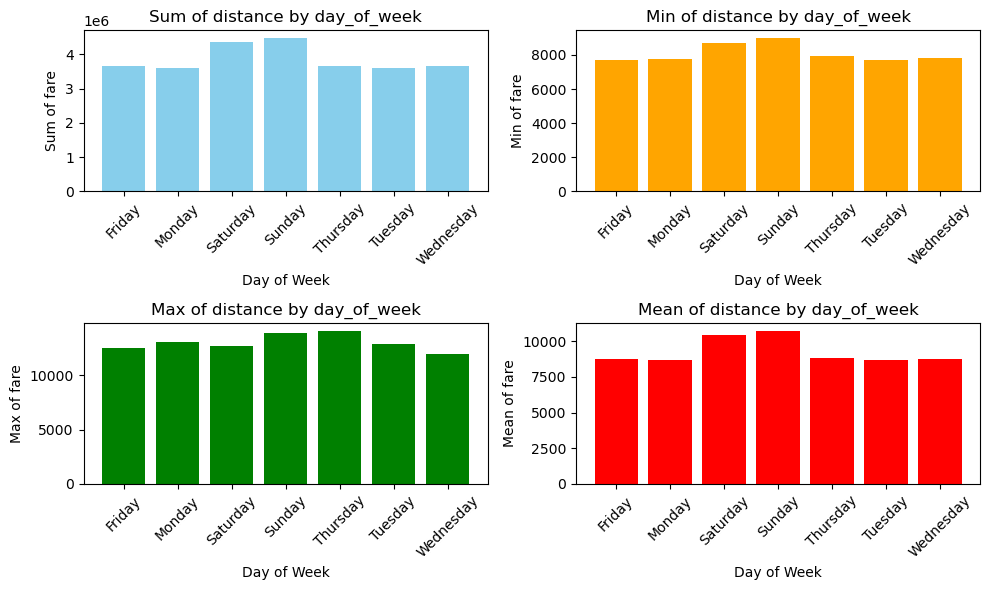

In [250]:
days = day_distance['day_of_week']
sum_values = day_distance['sum']
min_values = day_distance['min']
max_values = day_distance['max']
mean_values = day_distance['mean']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 합계에 대한 막대 그래프
plt.subplot(2, 2, 1)
plt.bar(days, sum_values, color='skyblue')
plt.title('Sum of distance by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Sum of fare')
plt.xticks(rotation=45)

# 최소값에 대한 막대 그래프
plt.subplot(2, 2, 2)
plt.bar(days, min_values, color='orange')
plt.title('Min of distance by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Min of fare')
plt.xticks(rotation=45)

# 최대값에 대한 막대 그래프
plt.subplot(2, 2, 3)
plt.bar(days, max_values, color='green')
plt.title('Max of distance by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Max of fare')
plt.xticks(rotation=45)

# 평균값에 대한 막대 그래프
plt.subplot(2, 2, 4)
plt.bar(days, mean_values, color='red')
plt.title('Mean of distance by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Mean of fare')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### (4) 월별

* 차량 운행수

In [253]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

day_vehicle_c = data_o_1.groupby('month', as_index= False)['vehicle_c'].agg(['sum','min', 'max', 'mean'])
day_vehicle_c

,month,sum,min,max,mean
0,1,94063,132,814,379.286290
1,2,84408,167,595,373.486726
2,3,98892,161,615,398.758065
3,4,99885,188,601,416.187500
4,5,102562,171,608,413.556452
5,6,103422,196,1413,430.925000
6,7,108360,182,619,436.935484
7,8,107756,189,685,434.500000
8,9,107139,201,700,446.412500
9,10,107369,173,661,432.939516


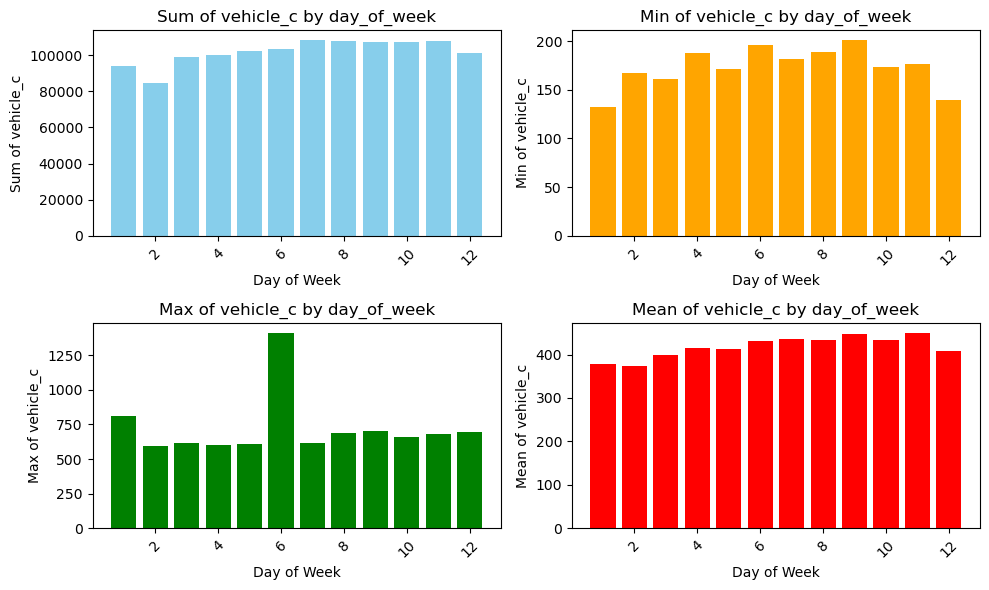

In [255]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
days = day_vehicle_c['month']
sum_values = day_vehicle_c['sum']
min_values = day_vehicle_c['min']
max_values = day_vehicle_c['max']
mean_values = day_vehicle_c['mean']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 합계에 대한 막대 그래프
plt.subplot(2, 2, 1)
plt.bar(days, sum_values, color='skyblue')
plt.title('Sum of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Sum of vehicle_c')
plt.xticks(rotation=45)

# 최소값에 대한 막대 그래프
plt.subplot(2, 2, 2)
plt.bar(days, min_values, color='orange')
plt.title('Min of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Min of vehicle_c')
plt.xticks(rotation=45)

# 최대값에 대한 막대 그래프
plt.subplot(2, 2, 3)
plt.bar(days, max_values, color='green')
plt.title('Max of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Max of vehicle_c')
plt.xticks(rotation=45)

# 평균값에 대한 막대 그래프
plt.subplot(2, 2, 4)
plt.bar(days, mean_values, color='red')
plt.title('Mean of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Mean of vehicle_c')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* 접수건, 탑승건

In [266]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
vc_bc = data_o_1.groupby('month', as_index= False)[['receipt_c', 'boarding_c']].agg(['sum','min', 'max', 'mean'])
vc_bc

receipt_c                          boarding_c                         
            sum   min   max         mean        sum   min   max         mean
month                                                                       
1        913093   591  5493  3681.826613     766881   551  4504  3092.262097
2        809554   856  5240  3582.097345     685249   770  4496  3032.075221
3        915450   527  5407  3691.330645     785868   462  4665  3168.822581
4        951475   623  6075  3964.479167     806054   591  4882  3358.558333
5        969822  1106  5861  3910.572581     813052  1012  4850  3278.435484
6        960313  1099  6100  4001.304167     809481  1013  4983  3372.837500
7       1016710   859  6092  4099.637097     852590   809  5083  3437.862903
8        995711   619  6134  4014.963710     830927   580  5120  3350.512097
9        951002   655  6182  3962.508333     789108   618  5189  3287.950000
10       993912   967  6164  4007.709677     822579   908  5106  3316.850806
11      1018558   951  5959  4243.991667     839640   891  5000  3498.500000
12       975026   609  6128  3931.556452     794113   580  4999  3202.068548

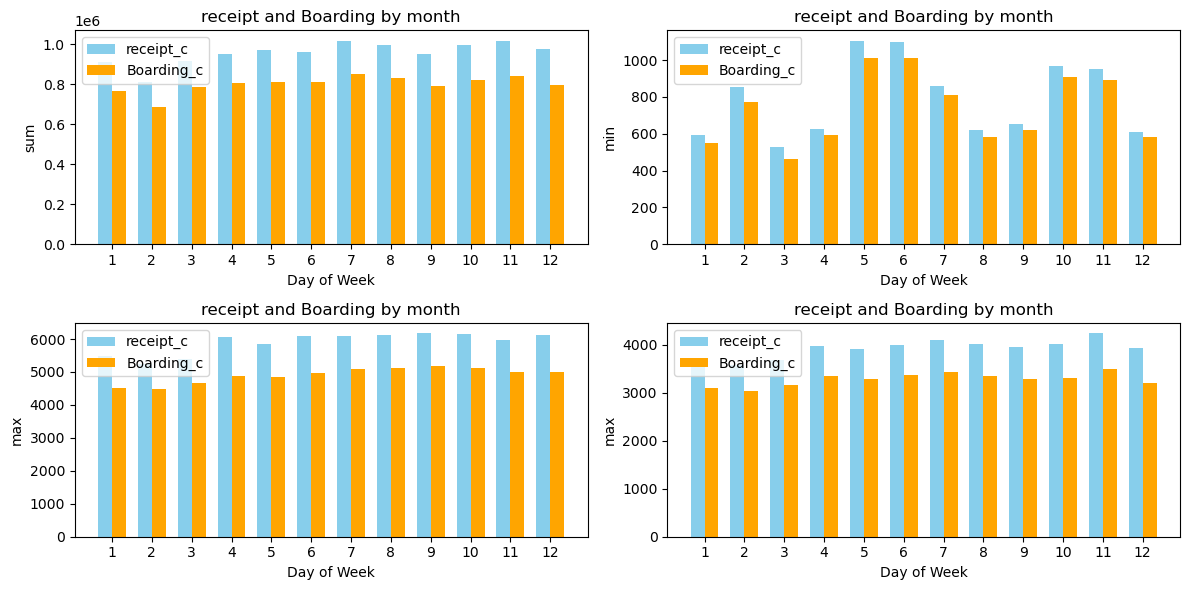

In [267]:
# 막대 그래프를 그릴 변수 추출
days =  vc_bc.index
sum_vehicle_c = vc_bc[('receipt_c', 'sum')]
sum_boarding_c = vc_bc[('boarding_c', 'sum')]
min_vehicle_c = vc_bc[('receipt_c', 'min')]
min_boarding_c = vc_bc[('boarding_c', 'min')]
max_vehicle_c = vc_bc[('receipt_c', 'max')]
max_boarding_c = vc_bc[('boarding_c', 'max')]
mean_vehicle_c = vc_bc[('receipt_c', 'mean')]
mean_boarding_c = vc_bc[('boarding_c', 'mean')]

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(days))

plt.subplot(2, 2, 1)
plt.bar(index, sum_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, sum_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by month')
plt.xlabel('Day of Week')
plt.ylabel('sum')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.subplot(2, 2, 2)
plt.bar(index, min_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, min_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by month')
plt.xlabel('Day of Week')
plt.ylabel('min')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(index, max_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, max_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by month')
plt.xlabel('Day of Week')
plt.ylabel('max')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.subplot(2, 2, 4)
plt.bar(index, mean_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, mean_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by month')
plt.xlabel('Day of Week')
plt.ylabel('max')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.tight_layout()
plt.show()

* 대기시간

In [268]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
day_wt = data_o_1.groupby('month', as_index= False)['waiting_time'].agg(['sum','min', 'max', 'mean'])
day_wt

,month,sum,min,max,mean
0,1,8281.7,17.2,76.7,33.393952
1,2,7778.8,18.3,78.9,34.419469
2,3,8725.2,18.2,74.1,35.182258
3,4,9510.9,20.1,79.9,39.628750
4,5,10213.0,19.7,80.8,41.181452
5,6,9691.6,17.8,77.0,40.381667
6,7,9928.3,18.4,69.7,40.033468
7,8,9565.1,18.2,84.5,38.568952
8,9,10167.4,18.2,89.2,42.364167
9,10,11031.1,18.5,83.7,44.480242


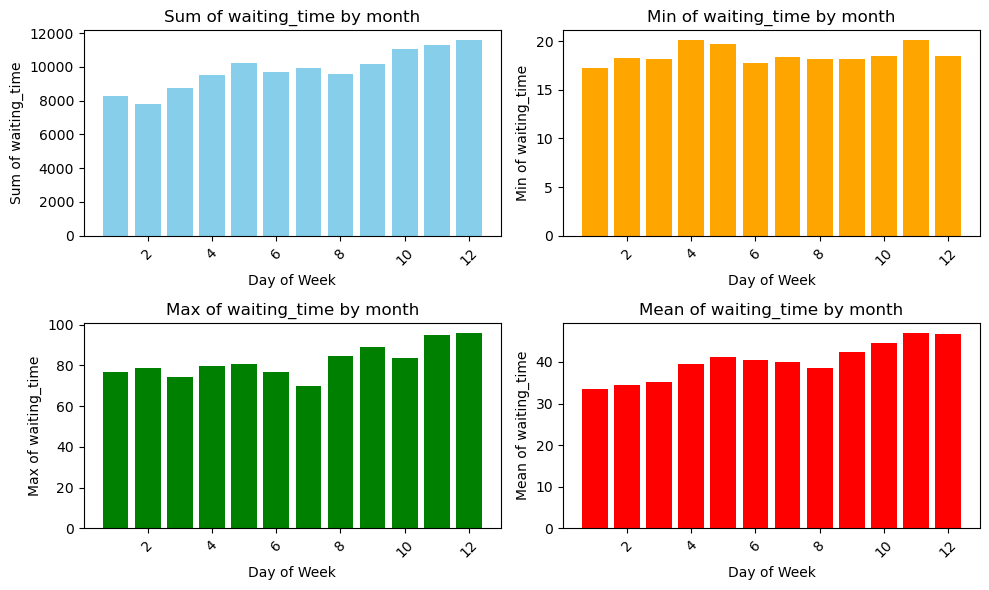

In [269]:
# 막대 그래프를 그릴 변수 추출
days = day_wt['month']
sum_values = day_wt['sum']
min_values = day_wt['min']
max_values = day_wt['max']
mean_values = day_wt['mean']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 합계에 대한 막대 그래프
plt.subplot(2, 2, 1)
plt.bar(days, sum_values, color='skyblue')
plt.title('Sum of waiting_time by month')
plt.xlabel('Day of Week')
plt.ylabel('Sum of waiting_time')
plt.xticks(rotation=45)

# 최소값에 대한 막대 그래프
plt.subplot(2, 2, 2)
plt.bar(days, min_values, color='orange')
plt.title('Min of waiting_time by month')
plt.xlabel('Day of Week')
plt.ylabel('Min of waiting_time')
plt.xticks(rotation=45)

# 최대값에 대한 막대 그래프
plt.subplot(2, 2, 3)
plt.bar(days, max_values, color='green')
plt.title('Max of waiting_time by month')
plt.xlabel('Day of Week')
plt.ylabel('Max of waiting_time')
plt.xticks(rotation=45)

# 평균값에 대한 막대 그래프
plt.subplot(2, 2, 4)
plt.bar(days, mean_values, color='red')
plt.title('Mean of waiting_time by month')
plt.xlabel('Day of Week')
plt.ylabel('Mean of waiting_time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


* 운임

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
day_fare = data_o_1.groupby('day_of_week', as_index= False)['fare'].agg(['sum','min', 'max', 'mean'])
day_fare

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

* 이동거리

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

### (5) 연도별

* 차량 운행수

In [278]:
day_vehicle_c = data_o_1.groupby('year', as_index= False)['vehicle_c'].agg(['sum','min', 'max', 'mean'])
day_vehicle_c

,year,sum,min,max,mean
0,2015,139236,163,507,381.468493
1,2016,142855,164,1413,390.314208
2,2017,147970,132,548,405.397260
3,2018,145182,164,570,397.758904
4,2019,145660,161,814,399.068493
5,2020,152447,185,654,416.521858
6,2021,170919,190,615,468.271233
7,2022,179178,209,700,490.898630


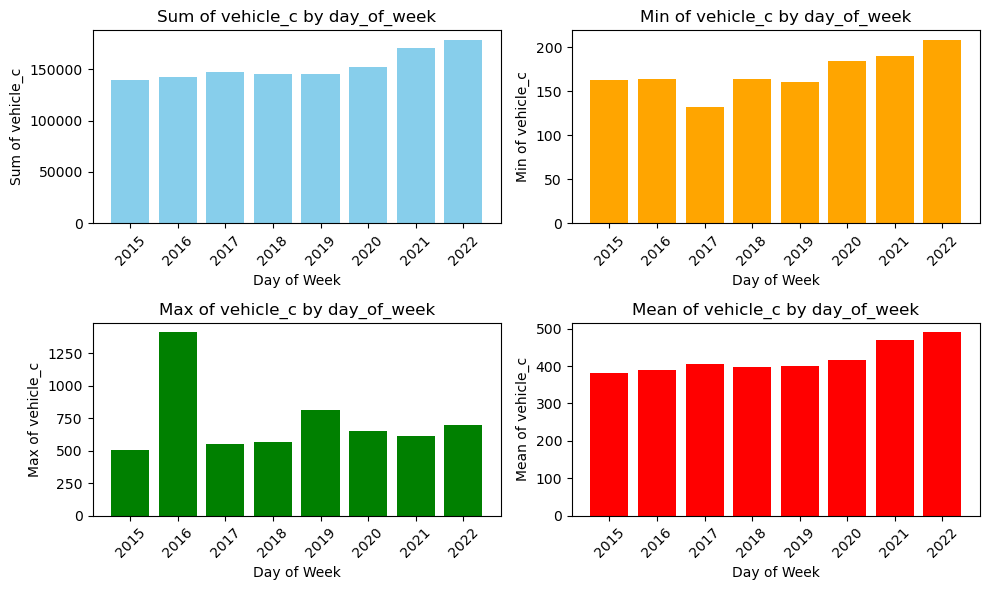

In [279]:
# 막대 그래프를 그릴 변수 추출
days = day_vehicle_c['year']
sum_values = day_vehicle_c['sum']
min_values = day_vehicle_c['min']
max_values = day_vehicle_c['max']
mean_values = day_vehicle_c['mean']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 합계에 대한 막대 그래프
plt.subplot(2, 2, 1)
plt.bar(days, sum_values, color='skyblue')
plt.title('Sum of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Sum of vehicle_c')
plt.xticks(rotation=45)

# 최소값에 대한 막대 그래프
plt.subplot(2, 2, 2)
plt.bar(days, min_values, color='orange')
plt.title('Min of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Min of vehicle_c')
plt.xticks(rotation=45)

# 최대값에 대한 막대 그래프
plt.subplot(2, 2, 3)
plt.bar(days, max_values, color='green')
plt.title('Max of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Max of vehicle_c')
plt.xticks(rotation=45)

# 평균값에 대한 막대 그래프
plt.subplot(2, 2, 4)
plt.bar(days, mean_values, color='red')
plt.title('Mean of vehicle_c by day_of_week')
plt.xlabel('Day of Week')
plt.ylabel('Mean of vehicle_c')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* 접수건, 탑승건

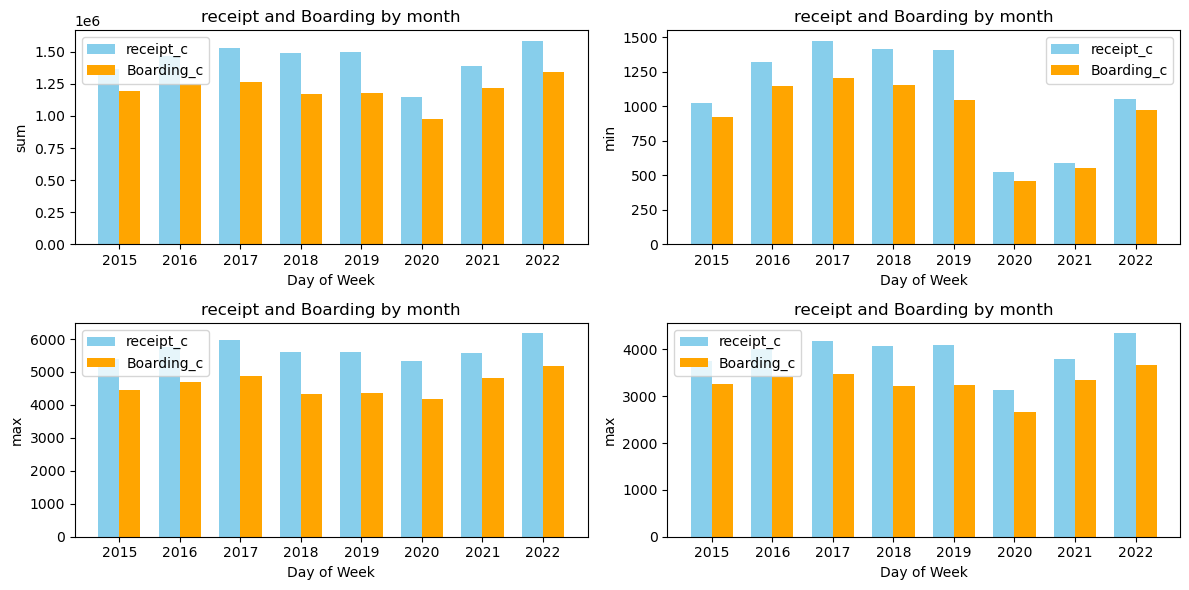

In [277]:
# 막대 그래프를 그릴 변수 추출
# 아래에 실습코드를 작성하고 결과를 확인합니다.
vc_bc = data_o_1.groupby('year', as_index= False)[['receipt_c', 'boarding_c']].agg(['sum','min', 'max', 'mean'])
vc_bc

days =  vc_bc.index
sum_vehicle_c = vc_bc[('receipt_c', 'sum')]
sum_boarding_c = vc_bc[('boarding_c', 'sum')]
min_vehicle_c = vc_bc[('receipt_c', 'min')]
min_boarding_c = vc_bc[('boarding_c', 'min')]
max_vehicle_c = vc_bc[('receipt_c', 'max')]
max_boarding_c = vc_bc[('boarding_c', 'max')]
mean_vehicle_c = vc_bc[('receipt_c', 'mean')]
mean_boarding_c = vc_bc[('boarding_c', 'mean')]

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(days))

plt.subplot(2, 2, 1)
plt.bar(index, sum_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, sum_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by month')
plt.xlabel('Day of Week')
plt.ylabel('sum')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.subplot(2, 2, 2)
plt.bar(index, min_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, min_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by month')
plt.xlabel('Day of Week')
plt.ylabel('min')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(index, max_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, max_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by month')
plt.xlabel('Day of Week')
plt.ylabel('max')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.subplot(2, 2, 4)
plt.bar(index, mean_vehicle_c, bar_width, color='skyblue', label='receipt_c')
plt.bar(index + bar_width, mean_boarding_c, bar_width, color='orange', label='Boarding_c')
plt.title('receipt and Boarding by month')
plt.xlabel('Day of Week')
plt.ylabel('max')
plt.xticks(index + bar_width / 2, days)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

## 3.데이터 구조 만들기

* **세부요구사항**
    * 조건 : 
        * 목표 : 전날 저녁, 다음날 평균 대기시간을 예측하고자 합니다.
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
    * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙입니다.

In [228]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_o = pd.read_csv('open_data.csv')
data_w = pd.read_csv('weather.csv')

# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_o.columns = ['Date', 'vehicle_c', 'receipt_c', 'boarding_c', 'waiting_time', 'fare', 'distance']
data_o

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611
2,2015-01-03,209,1648,1514,26.2,2377,10198
3,2015-01-04,196,1646,1526,24.5,2431,10955
4,2015-01-05,421,4250,3730,26.2,2214,8663
...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178
2918,2022-12-28,607,5654,4648,44.8,2161,7882
2919,2022-12-29,581,5250,4247,52.5,2229,8433
2920,2022-12-30,600,5293,4200,38.3,2183,8155


In [229]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
col = ['temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)']
data_w[col] = data_w[col].shift(-1)

data_w = data_w.fillna(method='ffill')
data_w.tail()

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
4013,2022-12-27,-0.3,-5.4,0.1,92.0,40.0,10.86
4014,2022-12-28,1.7,-7.8,0.0,71.0,34.0,10.88
4015,2022-12-29,2.1,-4.0,0.0,87.0,38.0,10.84
4016,2022-12-30,-4.4,-4.4,0.0,66.0,66.0,0.00
4017,2022-12-31,-4.4,-4.4,0.0,66.0,66.0,0.00


### (1) target 만들기
* 예측하는 날짜, 대기시간(target)으로 기준을 잡습니다.

In [230]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 익일의 대기시간(waiting time)을 오늘의 데이터를 활용하여 예측 해야하는 대상(target)으로 설정
target = 'waiting_time'

### (2) 날씨 데이터 붙이기
* merge를 활용합니다. 기준은 운행정보 입니다.

In [231]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 익일의 실제 날씨 데이터를 전일에 발표된 예보데이터로 판단

df = pd.merge(data_o, data_w)
df # 2922 rows × 13 columns

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,63.0,28.0,9.07
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,73.0,37.0,8.66
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,89.0,58.0,5.32
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,95.0,52.0,6.48
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,98.0,29.0,10.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,92.0,40.0,10.86
2918,2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,71.0,34.0,10.88
2919,2022-12-29,581,5250,4247,52.5,2229,8433,2.1,-4.0,0.0,87.0,38.0,10.84
2920,2022-12-30,600,5293,4200,38.3,2183,8155,-4.4,-4.4,0.0,66.0,66.0,0.00


In [232]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df.head()

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,63.0,28.0,9.07
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,73.0,37.0,8.66
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,89.0,58.0,5.32
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,95.0,52.0,6.48
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,98.0,29.0,10.47


### (3) 새로운 feature를 생성해 봅시다.
* 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 그외 새로운 feature 도출 : 최소 2개 이상
    * 예 : 공휴일, 최근 7주일간의 평균 대기시간, 탑승률 등

#### 1) 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 요일 이름, 계절이름, 월 이름으로 만드는 경우에는, 변수를 pd.Categorical로 범주형을 만들면서 순서를 지정하는 것이 이후 그래프를 그릴 때 순서대로 표현할 수 있습니다.


In [233]:
df['Date'] = pd.to_datetime(df['Date'])

In [234]:
df['weekday'] = df['Date'].dt.day_name()
df['weekday'] = pd.Categorical(df['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df['month'] = df['Date'].dt.month
df['season'] = np.where(df['month'].isin([3,4,5]), 'Spring',
                           np.where(df['month'].isin([6,7,8]), 'Summer',
                                    np.where(df['month'].isin([9,10,11]), 'Fall', 'Winter')))
df['season'] = pd.Categorical(df['season'], categories=['Spring','Summer','Fall','Winter'])
                                     
df['year'] = df['Date'].dt.year

#### 2) 공휴일 정보
* workalendar 패키지를 설치하고, 대한민국 공휴일 정보를 끌어와 봅시다.

* 휴무일 데이터 패키지 설치

In [235]:
# !pip install workalendar

* 간단 사용법

In [236]:
from workalendar.asia import SouthKorea
cal = SouthKorea()
pd.DataFrame(cal.holidays(2023))

,0,1
0,2023-01-01,New year
1,2023-01-21,Korean New Year's Day
2,2023-01-22,Korean New Year's Day
3,2023-01-23,Korean New Year's Day
4,2023-03-01,Independence Day
5,2023-05-05,Children's Day
6,2023-05-26,Buddha's Birthday
7,2023-06-06,Memorial Day
8,2023-08-15,Liberation Day
9,2023-09-28,Midautumn Festival


* 휴무일 데이터셋 만들기 2015 ~ 2022
* 실제로 휴무일에 해당하지만 workalendar 라이브러리에 없는 날짜는 직접 추가해봅시다.
    * 휴무일 장애인 콜택시의 접수건 변화에 대한 특징을 찾아 이를 바탕으로 데이터를 조회하여 찾아볼 수 있음

In [237]:
from workalendar.asia import SouthKorea

cal = SouthKorea()
holiday = pd.DataFrame()
for y in range(2015, 2023) :
    holiday = pd.concat([holiday, pd.DataFrame(cal.holidays(y))], axis = 0)

holiday.columns = ['Date', 'holiday']
holiday['Date'] = pd.to_datetime(holiday['Date'])
holiday['holiday'] = 1
holiday

,Date,holiday
0,2015-01-01,1
1,2015-02-18,1
2,2015-02-19,1
3,2015-02-20,1
4,2015-03-01,1
...,...,...
10,2022-09-10,1
11,2022-09-11,1
12,2022-10-03,1
13,2022-10-09,1


* 기존 데이터에 휴무일 정보 결합하기.
* 휴무일이 아닌 날짜는 0으로 저장하시오.

In [238]:
df = pd.merge(df, holiday, how = 'left')
df = df.fillna({'holiday':0})
df

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,1,Winter,2015,1.0
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,1,Winter,2015,0.0
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,1,Winter,2015,0.0
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,1,Winter,2015,0.0
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,1,Winter,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,92.0,40.0,10.86,Tuesday,12,Winter,2022,0.0
2919,2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,71.0,34.0,10.88,Wednesday,12,Winter,2022,0.0
2920,2022-12-29,581,5250,4247,52.5,2229,8433,2.1,-4.0,0.0,87.0,38.0,10.84,Thursday,12,Winter,2022,0.0
2921,2022-12-30,600,5293,4200,38.3,2183,8155,-4.4,-4.4,0.0,66.0,66.0,0.00,Friday,12,Winter,2022,0.0


#### 3) 7일 이동평균 대기시간
* rolling().mean() 사용

In [244]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# df['MA_week'] =df['waiting_time']
df['wt_ma7'] = df['waiting_time'].rolling( 7, min_periods = 1).mean()

In [245]:
df.head()

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,wt_ma7
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,1,Winter,2015,1.0,23.200
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,1,Winter,2015,0.0,20.200
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,1,Winter,2015,0.0,22.200
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,1,Winter,2015,0.0,22.775
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,1,Winter,2015,0.0,23.460


#### 4) 탑승률

In [247]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df['board_ratio'] = df['boarding_c'] / df['receipt_c']

#### 5) 1일 차량운행 접수건수

In [273]:
df['daily_vehicle'] =  df['receipt_c'] / df['vehicle_c'] 
df

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,temp_max,temp_min,rain(mm),...,humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,wt_ma7,board_ratio,daily_vehicle
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,...,28.0,9.07,Thursday,1,Winter,2015,1.0,23.200000,0.903226,4.802817
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,...,37.0,8.66,Friday,1,Winter,2015,0.0,20.200000,0.898987,7.519048
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,...,58.0,5.32,Saturday,1,Winter,2015,0.0,22.200000,0.918689,7.885167
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,...,52.0,6.48,Sunday,1,Winter,2015,0.0,22.775000,0.927096,8.397959
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,...,29.0,10.47,Monday,1,Winter,2015,0.0,23.460000,0.877647,10.095012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,...,40.0,10.86,Tuesday,12,Winter,2022,0.0,42.771429,0.825909,8.423019
2919,2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,...,34.0,10.88,Wednesday,12,Winter,2022,0.0,43.514286,0.822073,9.314662
2920,2022-12-29,581,5250,4247,52.5,2229,8433,2.1,-4.0,0.0,...,38.0,10.84,Thursday,12,Winter,2022,0.0,42.957143,0.808952,9.036145
2921,2022-12-30,600,5293,4200,38.3,2183,8155,-4.4,-4.4,0.0,...,66.0,0.00,Friday,12,Winter,2022,0.0,41.042857,0.793501,8.821667


In [274]:
df['daily_vehicle'].describe()

count    2923.000000
mean        9.223824
std         1.856285
min         2.028481
25%         8.414302
50%         9.575829
75%        10.412532
max        14.325513
Name: daily_vehicle, dtype: float64

## 4.데이터 저장
* **세부요구사항**
    * joblib 을 사용하여 작업 경로에 정리한 데이터프레임을 저장합니다.
        * 저장파일이름 : data1.pkl

In [275]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df.to_pickle('data1.pkl')